In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [17]:
start='2018-01-01'
end = '2023-12-31'
df = yf.download('ETH', start)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ETH,ETH,ETH,ETH,ETH,ETH
Date,,,,,,
2024-07-23 00:00:00+00:00,3.27,3.27,3.31,3.19,3.30,20130200
2024-07-24 00:00:00+00:00,3.17,3.17,3.27,3.16,3.27,31096200
2024-07-25 00:00:00+00:00,2.94,2.94,3.00,2.92,2.98,32041600
2024-07-26 00:00:00+00:00,3.08,3.08,3.10,3.03,3.04,36664500
2024-07-29 00:00:00+00:00,3.12,3.12,3.19,3.07,3.19,33673400
...,...,...,...,...,...,...
2024-11-12 00:00:00+00:00,3.11,3.11,3.12,3.03,3.07,45758000
2024-11-13 00:00:00+00:00,2.99,2.99,3.15,2.95,3.06,60861100


In [25]:
crypto_symbol = "BTC-USD"
start_date = "2018-01-01"
end_date = "2023-01-01"

df = yf.download(crypto_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [26]:
df = df.reset_index()
df.columns = df.columns.get_level_values(0)

In [27]:
df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [28]:
df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [34]:

# df = df.drop(['Date', 'Adj Close'], axis=1)
df
print(df.dtypes)

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


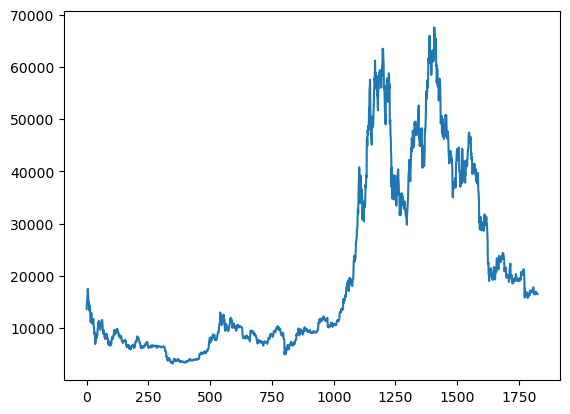

In [35]:
plt.plot(df.Close)

In [31]:
ma100 = df.Close.rolling(100).mean()

In [37]:
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
1821    18264.809980
1822    18234.894414
1823    18212.409941
1824    18192.961797
1825    18164.301250
Name: Close, Length: 1826, dtype: float64

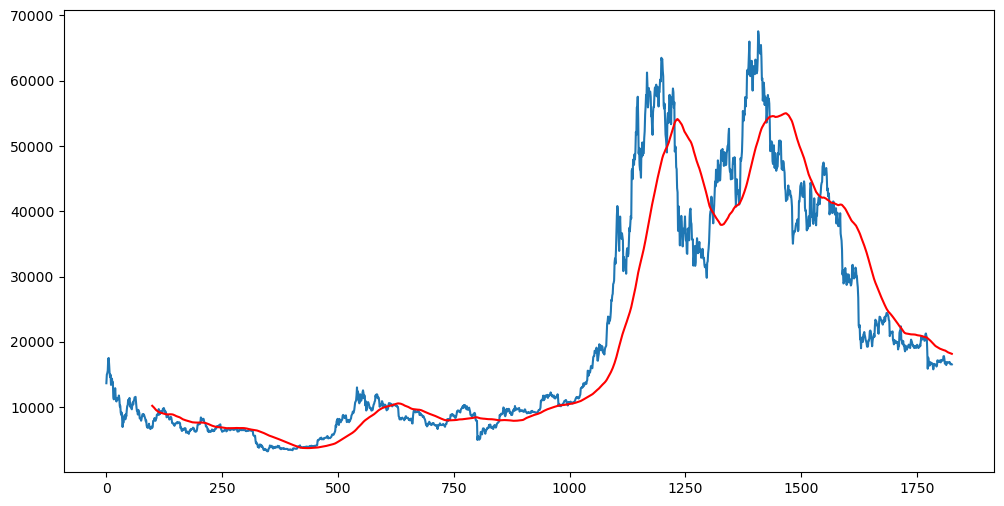

In [38]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [39]:
ma200 = df.Close.rolling(200).mean()

In [40]:
ma200

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
1821    19906.809121
1822    19847.767930
1823    19797.166396
1824    19767.742383
1825    19739.445898
Name: Close, Length: 1826, dtype: float64

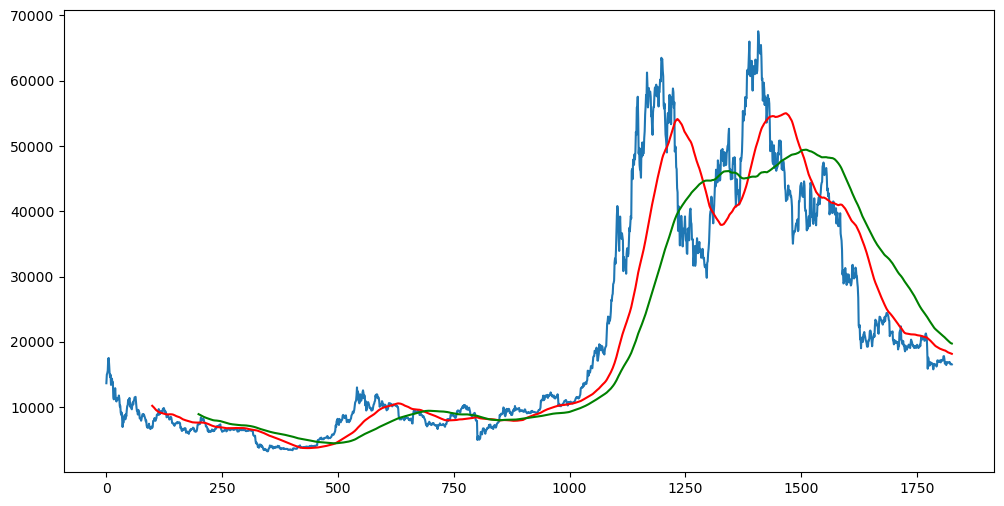

In [41]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [42]:
df.shape

(1826, 5)

In [43]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.4)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.4):int(len(df))])

In [44]:
print(data_training.shape)
print(data_testing.shape)

(730, 1)
(1096, 1)


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [46]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[7.29199771e-01],
       [8.21913369e-01],
       [8.37231545e-01],
       [8.65096735e-01],
       [9.93177161e-01],
       [1.00000000e+00],
       [9.26565228e-01],
       [8.35069203e-01],
       [7.94852993e-01],
       [8.21297578e-01],
       [7.11607314e-01],
       [7.51830563e-01],
       [7.78394192e-01],
       [7.37233213e-01],
       [7.40578140e-01],
       [5.77578772e-01],
       [5.56452435e-01],
       [5.76487145e-01],
       [5.85759209e-01],
       [6.76156568e-01],
       [5.85248316e-01],
       [5.38454190e-01],
       [5.34045586e-01],
       [5.68404705e-01],
       [5.61406921e-01],
       [5.55248871e-01],
       [5.74093889e-01],
       [5.98278203e-01],
       [5.63996101e-01],
       [4.80715433e-01],
       [4.88748876e-01],
       [4.15232987e-01],
       [3.91455214e-01],
       [4.15538798e-01],
       [3.52705669e-01],
       [2.60213177e-01],
       [3.16106575e-01],
       [3.06820502e-01],
       [3.51906527e-01],
       [3.84893425e-01],


In [47]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])


In [48]:
x_train

[array([[0.72919977],
        [0.82191337],
        [0.83723155],
        [0.86509673],
        [0.99317716],
        [1.        ],
        [0.92656523],
        [0.8350692 ],
        [0.79485299],
        [0.82129758],
        [0.71160731],
        [0.75183056],
        [0.77839419],
        [0.73723321],
        [0.74057814],
        [0.57757877],
        [0.55645244],
        [0.57648715],
        [0.58575921],
        [0.67615657],
        [0.58524832],
        [0.53845419],
        [0.53404559],
        [0.5684047 ],
        [0.56140692],
        [0.55524887],
        [0.57409389],
        [0.5982782 ],
        [0.5639961 ],
        [0.48071543],
        [0.48874888],
        [0.41523299],
        [0.39145521],
        [0.4155388 ],
        [0.35270567],
        [0.26021318],
        [0.31610658],
        [0.3068205 ],
        [0.35190653],
        [0.38489342],
        [0.37684037],
        [0.34241616],
        [0.39816051],
        [0.37518953],
        [0.43791209],
        [0

In [49]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [50]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [51]:
model = Sequential()


model.add(LSTM (units = 50, activation='relu', return_sequences = True, input_shape= (x_train.shape [1], 1)))
model.add (Dropout(0.2))


model.add(LSTM (units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM (units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))


model.add (LSTM (units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [53]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50


2024-11-19 18:17:58.777031: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 4s 113ms/step - loss: 0.0434
Epoch 2/50
20/20 [==============================] - 2s 111ms/step - loss: 0.0125
Epoch 3/50
20/20 [==============================] - 2s 117ms/step - loss: 0.0089
Epoch 4/50
20/20 [==============================] - 2s 111ms/step - loss: 0.0082
Epoch 5/50
20/20 [==============================] - 2s 113ms/step - loss: 0.0061
Epoch 6/50
20/20 [==============================] - 2s 122ms/step - loss: 0.0060
Epoch 7/50
20/20 [==============================] - 2s 115ms/step - loss: 0.0062
Epoch 8/50
20/20 [==============================] - 2s 114ms/step - loss: 0.0063
Epoch 9/50
20/20 [==============================] - 2s 116ms/step - loss: 0.0061
Epoch 10/50
20/20 [==============================] - 2s 118ms/step - loss: 0.0050
Epoch 11/50
20/20 [==============================] - 2s 116ms/step - loss: 0.0049
Epoch 12/50
20/20 [==============================] - 3s 131ms/step - loss: 0.0054
Epoch 13/50
20/20 [=================

In [54]:
model.save('keras_model.h5')

In [55]:
past_100_days = data_training.tail(100)

In [57]:
# Combine two DataFrames row-wise
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

# Display the combined DataFrame
print(final_df)

             Close
0      9729.324219
1      8620.566406
2      8486.993164
3      8118.967773
4      8251.845703
...            ...
1191  16717.173828
1192  16552.572266
1193  16642.341797
1194  16602.585938
1195  16547.496094

[1196 rows x 1 columns]


In [58]:
final_df.head()

,Close
0,9729.324219
1,8620.566406
2,8486.993164
3,8118.967773
4,8251.845703


In [59]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07601976],
       [0.05830686],
       [0.05617296],
       ...,
       [0.18645834],
       [0.18582322],
       [0.18494314]])

In [60]:
input_data.shape

(1196, 1)

In [61]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i, 0])

In [62]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1096, 100, 1)
(1096,)


In [63]:
y_predicted = model.predict(x_test)
y_predicted.shape

35/35 [==============================] - 1s 30ms/step


(1096, 1)

In [64]:
y_test

array([0.03561545, 0.03218546, 0.03792726, ..., 0.18645834, 0.18582322,
       0.18494314])

In [65]:
y_predicted

array([[0.05378821],
       [0.05384334],
       [0.05380253],
       ...,
       [0.19633353],
       [0.19788817],
       [0.19878145]], dtype=float32)

In [66]:
scaler.scale_

array([1.59754515e-05])

In [67]:
scale_factor = 1/0.00615148

In [68]:
y_predicted *= scale_factor
y_test *= scale_factor

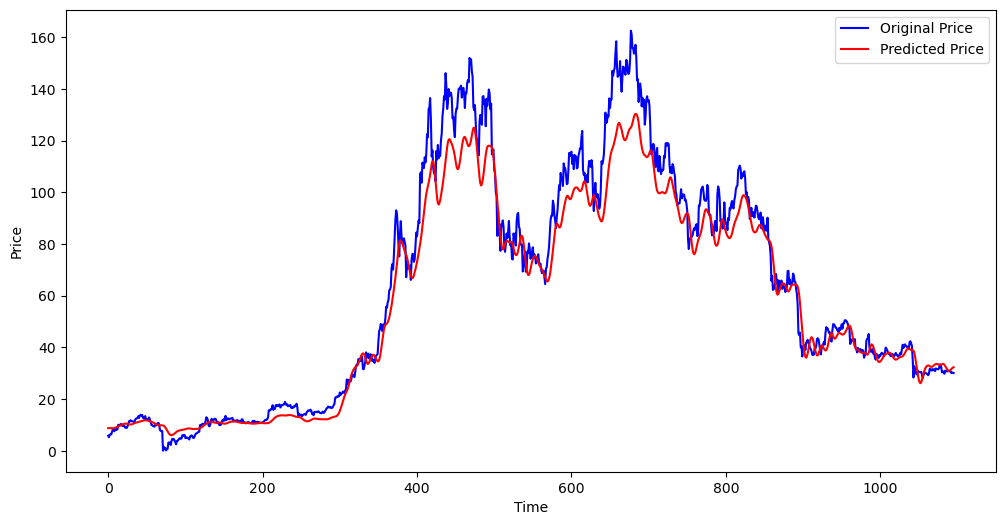

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()